In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:, [3,4]].values
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Text(0, 0.5, 'WCSS')

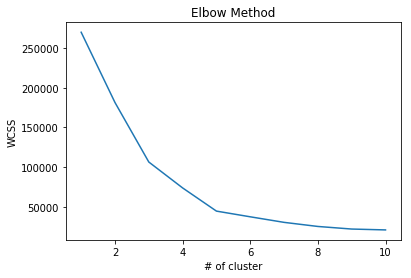

In [8]:
from sklearn.cluster import KMeans
wcss = [] 
# try different values for k and evaluate which one is better using elbow method
for i in range(1, 11):
    # init k-means++ is to avoid initialization trap
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=100, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11), wcss)
plt.title("Elbow Method")
plt.xlabel('# of cluster')
plt.ylabel('WCSS')

We can see that when number of cluster is bigger than 5, the WCSS starts to decrese slowly, so we can consider that the model starts to overfit.

In [9]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=100, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

Text(0, 0.5, 'Spending Score (1-100)')

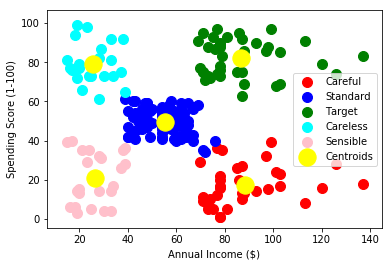

In [20]:
plt.scatter(X[y_kmeans==0,0], X[y_kmeans==0,1], s=100, c='red', label='Careful')
plt.scatter(X[y_kmeans==1,0], X[y_kmeans==1,1], s=100, c='blue', label='Standard')
plt.scatter(X[y_kmeans==2,0], X[y_kmeans==2,1], s=100, c='green', label='Target')
plt.scatter(X[y_kmeans==3,0], X[y_kmeans==3,1], s=100, c='cyan', label='Careless')
plt.scatter(X[y_kmeans==4,0], X[y_kmeans==4,1], s=100, c='pink', label='Sensible')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, c='yellow', label='Centroids')
plt.legend()
plt.xlabel('Annual Income ($)')
plt.ylabel('Spending Score (1-100)')